<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Auto_Model_Training_and_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation">Auto Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Pycaret</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
    </ul>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **Import libaray**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data

**Free Builten Dataset**

**Wine Dataset**

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Breast Cancer Dataset**


In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Boston Housing Dataset**


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **3- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [ ]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [ ]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

# **4-Convert target variable into binary Form**

In [ ]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **5- Data Imbalanced problem**


## **5.1 Check Imbalanced Problem in Data**

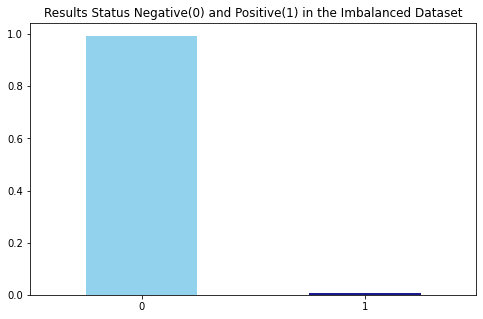

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **5.2 Data resample**

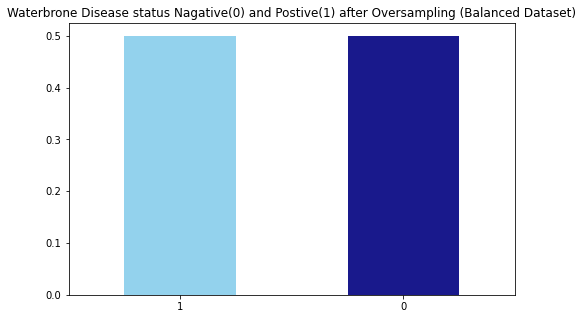

In [ ]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

#**6- Missing Values** 

## **6.2- Check missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,796,0.01749
RESULT_TEXT,0,0.00000
CPT_ID.1,0,0.00000
RESULT_VALUE,0,0.00000


# **8-Hot Encoding**

In [ ]:
oversampled.select_dtypes(include=['object']).columns


Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'RESULT_VALUE'],
      dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

# **9-Outlier detection**

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MRNO               6094.25
AGE                  28.00
GENDER                1.00
DISTRICT              3.00
TEHSIL                7.00
REPORT_VERIFIED    9501.50
CPT_ID             2200.00
RESULT_VALUE          0.00
CPT_ID.1              0.00
RESULT_TEXT           1.00
dtype: float64


In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(34554, 10)

In [ ]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


# **10- Data spliting**

In [ ]:
X=MiceImputed.drop('RESULT_TEXT',axis=1)

In [ ]:
y=MiceImputed[['RESULT_TEXT']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
X_train

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1
4416,5570.0,20.0,1.0,0.0,1.0,18737.0,1.000000e+15,1.0,1.000000e+15
2774,9926.0,14.0,0.0,0.0,1.0,21942.0,1.000000e+15,1.0,1.000000e+15
20656,2202.0,24.0,1.0,0.0,1.0,22385.0,1.000000e+15,1.0,1.000000e+15
15090,2641.0,15.0,1.0,0.0,1.0,20319.0,1.000000e+15,1.0,1.000000e+15
21760,6610.0,88.0,1.0,21.0,36.0,5285.0,1.000000e+15,1.0,1.000000e+15
...,...,...,...,...,...,...,...,...,...
16415,7492.0,95.0,0.0,20.0,34.0,11127.0,1.000000e+15,1.0,1.000000e+15
79,198.0,20.0,1.0,21.0,36.0,8050.0,1.000000e+15,1.0,1.000000e+15
12199,2406.0,11.0,0.0,0.0,1.0,18688.0,1.000000e+15,1.0,1.000000e+15
14238,9766.0,62.0,1.0,21.0,7.0,7773.0,1.000000e+15,1.0,1.000000e+15


# **11- Auto Model Training and Evaluation**

## **11.1-PyCaret**

PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is incredibly popular for its ease of use, simplicity, and ability to build and deploy end-to-end ML prototypes quickly and efficiently.PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few lines only. This makes the experiment cycle exponentially fast and efficient [1]

PyCaret is simple and easy to use. All the operations performed in PyCaret are sequentially stored in a Pipeline that is fully automated for deployment. Whether it’s imputing missing values, one-hot-encoding, transforming categorical data, feature engineering, or even hyperparameter tuning, PyCaret automates all of it.

### **Installing Pycaret**

In [ ]:
#capture #suppresses the displays
# install the full version
!pip install pycaret[full]

In [ ]:
!pip install pyyaml==5.4.1


     |████████████████████████████████| 636 kB 32.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


By installing the full version of pycaret, all the optional dependencies as listed here are also installed.

###**Import the necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 
import pycaret
from pycaret.regression import *
from pycaret.classification import *


### **Data Preparation** [3]

In [ ]:
from pycaret.regression import *
s = setup(MiceImputed, target = 'RESULT_TEXT', transform_target = True, log_experiment = True, experiment_name = 'diamond')

### **Classificaiton**

**Models Training**

In [ ]:
clf = setup(MiceImputed, target = "RESULT_TEXT",
            ignore_features=["CPT_ID.1"], 
            silent = True, session_id = 786, use_gpu =True,
            preprocess=True,
            log_data=True,
            log_experiment=True,
            normalize=True)

,Description,Value
0,session_id,786
1,Target,RESULT_TEXT
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(45512, 10)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


setup function in PyCaret, profiles the dataset and infers the data types for all input features. It is the first and the only mandatory step to start any machine learning experiment in PyCaret.

**Model Evulaiton**

This function trains all the available models in the model library using default hyperparameters and evaluates performance metrics using cross-validation. The number of folds can be defined using the foldparameter (default = 10 folds). The table is sorted (highest to lowest) by the metric of choice which can be defined using the sortparameter(in this case we have sorted it on RMSE)
n_select parameter in the setup function controls the return of trained models. In this case, I am setting it to 15, meaning return the top 15 models as a list. pull function in the second line stores the output of compare_models as pd.DataFrame .

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,1.0000,1.0000,0.9993,0.9997,0.9993,0.9993,2.257
et,Extra Trees Classifier,0.9995,1.0000,1.0000,0.9989,0.9995,0.9989,0.9989,1.833
dt,Decision Tree Classifier,0.9976,0.9977,1.0000,0.9953,0.9976,0.9953,0.9953,0.080
catboost,CatBoost Classifier,0.9975,1.0000,1.0000,0.9950,0.9975,0.9950,0.9951,7.435
lightgbm,Light Gradient Boosting Machine,0.9933,0.9998,1.0000,0.9868,0.9933,0.9866,0.9867,0.380
knn,K Neighbors Classifier,0.9928,0.9981,1.0000,0.9858,0.9928,0.9856,0.9857,0.941
gbc,Gradient Boosting Classifier,0.9147,0.9703,0.9439,0.8912,0.9168,0.8293,0.8308,2.641
ada,Ada Boost Classifier,0.7855,0.8869,0.7679,0.7947,0.7808,0.5709,0.5715,0.934
svm,SVM - Linear Kernel,0.6109,0.0000,0.3332,0.7442,0.4600,0.2201,0.2638,0.152
lr,Logistic Regression,0.6105,0.6827,0.4984,0.6399,0.5603,0.2202,0.2258,0.111


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)

**Select Best Model**


In [ ]:
best= compare_models(n_select = 2, sort= 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,1.0000,1.0000,0.9993,0.9997,0.9993,0.9993,2.259
et,Extra Trees Classifier,0.9995,1.0000,1.0000,0.9989,0.9995,0.9989,0.9989,1.830
dt,Decision Tree Classifier,0.9976,0.9977,1.0000,0.9953,0.9976,0.9953,0.9953,0.080
catboost,CatBoost Classifier,0.9975,1.0000,1.0000,0.9950,0.9975,0.9950,0.9951,7.465
lightgbm,Light Gradient Boosting Machine,0.9933,0.9998,1.0000,0.9868,0.9933,0.9866,0.9867,0.376
knn,K Neighbors Classifier,0.9928,0.9981,1.0000,0.9858,0.9928,0.9856,0.9857,0.760
gbc,Gradient Boosting Classifier,0.9147,0.9703,0.9439,0.8912,0.9168,0.8293,0.8308,2.636
ada,Ada Boost Classifier,0.7855,0.8869,0.7679,0.7947,0.7808,0.5709,0.5715,0.932
svm,SVM - Linear Kernel,0.6109,0.0000,0.3332,0.7442,0.4600,0.2201,0.2638,0.152
lr,Logistic Regression,0.6105,0.6827,0.4984,0.6399,0.5603,0.2202,0.2258,0.107


In [ ]:
compare_model_result = pull()



since the RandomForestregressor was evaluated to have a comparatively better Accuracy, let us build the model using RandomForestregressor

**Build the model using Best MODEL**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
1,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994
2,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000
3,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
4,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994
5,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000
7,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
8,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
9,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000


**Hyperparameter tuning**



In [ ]:
tuned_rf= tune_model(rf, optimize='Accuracy', search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9787,0.9986,1.0,0.9589,0.9790,0.9573,0.9582
1,0.9787,0.9987,1.0,0.9589,0.9790,0.9573,0.9582
2,0.9780,0.9980,1.0,0.9578,0.9784,0.9561,0.9570
3,0.9805,0.9987,1.0,0.9624,0.9808,0.9611,0.9618
4,0.9765,0.9988,1.0,0.9549,0.9769,0.9529,0.9540
5,0.9787,0.9992,1.0,0.9589,0.9790,0.9573,0.9582
6,0.9812,0.9990,1.0,0.9636,0.9814,0.9623,0.9630
7,0.9809,0.9989,1.0,0.9630,0.9811,0.9617,0.9624
8,0.9786,0.9974,1.0,0.9589,0.9790,0.9573,0.9582
9,0.9790,0.9986,1.0,0.9595,0.9793,0.9579,0.9588


Optimum Hyperparameters selected by using Optuna


In [ ]:
tuned_rf

**Analyze the Model Performance**


In [ ]:
plot_model(tuned_rf)

**Interpret the results**


In PyCaret, we can interpret the model by SHAP values and correlation plot with just one line of code

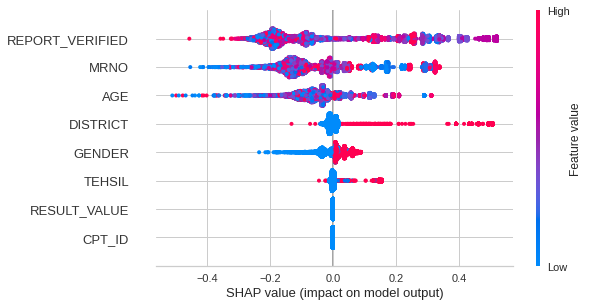

In [ ]:
interpret_model(tuned_rf)

**Evaluate the Model**


If we do not want to plot all these visualizations individually, then the PyCaret library has another amazing function — evaluate_model. In this function, you just need to pass the model object and PyCaret will create an interactive window for you to see and analyze the model in all the possible ways:

In [ ]:
evaluate_model(tuned_rf)

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,{}
criterion,gini
max_depth,11
max_features,0.8494648729006423
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,2.20204088509967e-08
min_impurity_split,None


**Cross-validation**

Evaluate the model on the holdout set used for validation


In [ ]:
val_rf_pred = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9789,0.9978,1.0,0.9599,0.9795,0.9578,0.9586


The predictions (Label) made is as follows:-


In [ ]:
val_rf_pred

In [ ]:
y_test

,RESULT_TEXT
9662,1.0
14694,1.0
2120,0.0
11684,1.0
724,1.0
...,...
20342,1.0
21213,1.0
5755,1.0
9849,1.0


**Make predictions on test data**


In [ ]:
# predictions on new datasetRESULT_TEXT
pred_new_rf = predict_model(tuned_rf, data = X_test) #new_data is pd dataframe
#pred_new_rf = pred_new_rf.rename(columns={‘RESULT_TEXT’:’prediction’})
pred_new_rf = pred_new_rf.rename(columns={'RESULT_TEXT':'Prediction'})
pred_new_rf

RandomForestRegressor submission Scores(RMSE) : 4234.403588306586.


### **Building Ensemble Models using PyCaret**

Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. In PyCaret, we can create bagging, boosting, blending, and stacking ensemble models with just one line of code. Here we will try with blending.
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome.

In [ ]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9984,1.0,1.0,0.9969,0.9984,0.9969,0.9969
1,0.9987,1.0,1.0,0.9975,0.9987,0.9975,0.9975
2,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
3,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
4,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
5,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994
6,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
7,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
8,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
9,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994


The calibrated blending model is as follows:-


In [ ]:
blender_specific

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

**Analyzing model performance in PyCaret**

In [ ]:
plot_model(blender_specific)

**Evaluate the model performance**


In [ ]:
evaluate_model(blender_specific)

**Make predictions on the validation set**


In [ ]:
val_pred = predict_model(blender_specific)

**Make Predictions on unseen data**


In [ ]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = X_train) #new_data is pd dataframe
pred_new = pred_new.rename(columns={‘RESULT_VALUE’:'prediction'})
pred_new

**Save and Load the Model**


In [ ]:
save_model(blender_specific , ‘/content/drive/MyDrive/blender_specific_saved_06142021’)
# Loading the saved model
blend_saved = load_model(‘/content/drive/MyDrive/blender_specific_saved_06142021’)
pred = blend_saved.predict(test)
pred[:5]

## **12-AutoML-Gs**

**Installing required libraries**


In [ ]:
!pip install automl-gs


**Importing required libraries**


In [ ]:
import automl_gs
from automl_gs import automl_grid_search


**Creating the Model**


In [ ]:
automl_grid_search(MiceImputed, 'RESULT_TEXT')


# **References**

[1-Build a machine learning model with PyCaret and corresponding user interface with Gradio](https://medium.com/nerd-for-tech/build-a-machine-learning-model-with-pycaret-and-corresponding-user-interface-with-gradio-57ff09b7d262)

[2-PyCaret in Machine Learning](https://thecleverprogrammer.com/2021/03/07/pycaret-in-machine-learning/)

[3-PyCaret 101: An introduction for beginners](https://www.kdnuggets.com/2021/06/pycaret-101-introduction-beginners.html?fbclid=IwAR29t4C5QplspexoIyAd4eYfUjlZSOFL5wVmxc9sU5qXr_mMqIPfaJVmP6Y)

[7 Top AutoML Tools](https://victorzhou.com/posts/tools-for-auto-ml/)

[Easy MLOps with PyCaret + MLflow](https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6)